<a href="https://colab.research.google.com/github/Jhz-ops/algo-bot/blob/main/FDA_Algo_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing Libraries.
!pip uninstall -y numpy pandas tensorflow tensorboard stable-baselines3 gym gymnasium pandas_ta lightgbm scikit-learn python-binance

!pip install numpy==1.24.3
!pip install tensorflow==2.12.0
!pip install tensorboard==2.12.0
!pip install stable-baselines3[extra]==2.0.0
!pip install gymnasium

!pip install pandas
!pip install pandas-ta
!pip install scikit-learn
!pip install lightgbm

!pip install python-binance


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: tensorboard 2.18.0
Uninstalling tensorboard-2.18.0:
  Successfully uninstalled tensorboard-2.18.0
Found existing installation: gym 0.25.2
Uninstalling gym-0.25.2:
  Successfully uninstalled gym-0.25.2
Found existing installation: gymnasium 1.1.1
Uninstalling gymnasium-1.1.1:
  Successfully uninstalled gymnasium-1.1.1
Found existing installation: lightgbm 4.5.0
Uninstalling lightgbm-4.5.0:
  Successfully uninstalled lightgbm-4.5.0
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.3 MB/s eta 

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 103.5 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 38.1 MB/s eta 0:00:00
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.0.0
    Uninstalling google-auth-oauthlib-1.0.0:
      Successfully uninstalled google-auth-oauthlib-1.0.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, which is not installed.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, which is not installed.
dopamine-rl 4.1.2 requires pandas>=0.24.2, which is not installed.
pandas-gbq 0.29.0 requires pandas>=1.1.4, which is not installed.
tensorflow-decisio

In [1]:
# Trading Bot Framework with Enhanced LGBM Classifier and Reinforcement Learning

# 0. Imports
import pandas as pd
import pandas_ta as ta
from binance.client import Client
from binance.enums import *
import time
import datetime
import numpy as np
import os
import pickle
import traceback

# ML Imports
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score

import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import EvalCallback

# Visualization Imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [22]:
# 1. Configuration & Global Variables
API_KEY = ""  # Replace with your actual key
API_SECRET = "" # Replace with your actual secret
USE_TESTNET = True

# Defining Variables for Technical Analysis
SYMBOL = "SOLUSDT" # Can be any Coin
TIMEFRAME_STRATEGY = Client.KLINE_INTERVAL_1MINUTE
TRADE_USDT_AMOUNT = 100

RSI_PERIOD = 14
RSI_OVERSOLD = 30
RSI_OVERBOUGHT = 70
PSAR_INITIAL_AF = 0.02
PSAR_AF_INCREMENT = 0.02
PSAR_MAX_AF = 0.2
ATR_PERIOD = 14
SMA_FAST_PERIOD = 5
SMA_MEDIUM_PERIOD = 8
SMA_SLOW_PERIOD = 13
STOCH_K_PERIOD = 14
STOCH_D_PERIOD = 3
STOCH_SMOOTH_K = 3
BB_PERIOD = 20
BB_STD_DEV = 2


# LGBM Enhancements
LGBM_MODEL_DATA_FILENAME = "lgbm_enhanced_predictor.pkl"
LGBM_LOOKAHEAD_BARS = 3 # Predict over a slightly longer horizon
LGBM_SIGNIFICANT_CHANGE_THRESHOLD = 0.0005 # 0.05% for 1-min chart (adjust based on ATR later if desired)
LAG_PERIODS = [1, 2, 3] # For lagged features

RL_MODEL_FILENAME = "rl_agent_enhanced_lgbm.zip"
RL_ENV_SCALER_FILENAME = "rl_env_scaler_enhanced_lgbm.pkl"
RL_TRAINING_TIMESTEPS = 75000
RL_EVAL_FREQ = 5000
INITIAL_ACCOUNT_BALANCE_RL = 1000.0

bot_in_position = False
bot_entry_price = 0.0
bot_current_usdt_balance = INITIAL_ACCOUNT_BALANCE_RL
bot_current_asset_balance = 0.0
lgbm_model_data = None
rl_agent = None
rl_env_scaler = None



In [23]:
# 2. Binance Client Initialization
def initialize_binance_client():
    if API_KEY == "YOUR_BINANCE_API_KEY" or API_SECRET == "YOUR_BINANCE_API_SECRET":
        print("WARNING: API Keys are placeholders.")
    if not (API_KEY == "YOUR_BINANCE_API_KEY" and not USE_TESTNET):
        try:
            client = Client(API_KEY, API_SECRET, testnet=USE_TESTNET)
            client.ping(); print(f"Successfully connected to Binance ({'Testnet' if USE_TESTNET else 'Live Market'}).")
            return client
        except Exception as e: print(f"Error connecting to Binance: {e}. No-client mode."); return None
    else: print("Running in no-client mode."); return None
binance_client = initialize_binance_client()

Successfully connected to Binance (Testnet).


In [25]:
# 3. Fetching Historical Data from Binance
def fetch_historical_klines(client, symbol, timeframe, lookback_str="3 days ago UTC"):
    if not client: print(f"No Binance client for {symbol}."); return pd.DataFrame()
    try:
        klines = client.get_historical_klines(symbol, timeframe, lookback_str)
        df = pd.DataFrame(klines, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume','close_time', 'quote_asset_volume', 'number_of_trades','taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)
        df.set_index('timestamp', inplace=True)
        for col in ['open', 'high', 'low', 'close', 'volume']: df[col] = pd.to_numeric(df[col], errors='coerce')
        df.dropna(subset=['open', 'high', 'low', 'close', 'volume'], inplace=True)
        return df[['open', 'high', 'low', 'close', 'volume']]
    except Exception as e: print(f"Error fetching klines for {symbol} {timeframe}: {e}"); return pd.DataFrame()

In [26]:
# 4. Technical Indicator Calculation
def calculate_technical_indicators(df):
    min_len = max(RSI_PERIOD, PSAR_INITIAL_AF, ATR_PERIOD, SMA_SLOW_PERIOD, BB_PERIOD, STOCH_K_PERIOD + STOCH_D_PERIOD, max(LAG_PERIODS) if LAG_PERIODS else 0) + 10
    if df.empty or len(df) < min_len:
        print(f"Warning: DataFrame too short (len {len(df)}, need {min_len}) for indicators."); return pd.DataFrame()

    df_processed = df.copy()
    df_processed['rsi'] = ta.rsi(df_processed['close'], length=RSI_PERIOD)
    psar_df = ta.psar(df_processed['high'], df_processed['low'], af=PSAR_INITIAL_AF, step=PSAR_AF_INCREMENT, max_af=PSAR_MAX_AF)
    if psar_df is not None and not psar_df.empty:
        psarl_col = next((col for col in psar_df.columns if 'PSARl' in col), None)
        psars_col = next((col for col in psar_df.columns if 'PSARs' in col), None)
        if psarl_col and psars_col: df_processed['psar'] = psar_df[psarl_col].fillna(psar_df[psars_col])
        elif psarl_col: df_processed['psar'] = psar_df[psarl_col]
        elif psars_col: df_processed['psar'] = psar_df[psars_col]
        else: df_processed['psar'] = psar_df.iloc[:, 0]
    else: df_processed['psar'] = np.nan
    df_processed['atr'] = ta.atr(df_processed['high'], df_processed['low'], df_processed['close'], length=ATR_PERIOD)

    # Interaction & Derived Features for LGBM
    df_processed['rsi_oversold_flag'] = (df_processed['rsi'] < RSI_OVERSOLD).astype(int)
    df_processed['rsi_overbought_flag'] = (df_processed['rsi'] > RSI_OVERBOUGHT).astype(int)
    df_processed['price_above_psar_flag'] = (df_processed['close'] > df_processed['psar']).astype(int)
    df_processed['price_psar_diff_pct'] = (df_processed['close'] - df_processed['psar']) / df_processed['psar']
    df_processed['rsi_sma_10_diff'] = df_processed['rsi'] - ta.sma(df_processed['rsi'], length=10)
    df_processed['atr_normalized'] = df_processed['atr'] / df_processed['close']

    # Lagged Features (RSI, PSAR, ATR)
    for lag in LAG_PERIODS:
        df_processed[f'rsi_lag_{lag}'] = df_processed['rsi'].shift(lag)
        df_processed[f'psar_lag_{lag}'] = df_processed['psar'].shift(lag)
        df_processed[f'atr_lag_{lag}'] = df_processed['atr'].shift(lag)

    # Other indicators
    df_processed['sma_fast'] = ta.sma(df_processed['close'], length=SMA_FAST_PERIOD)
    df_processed['sma_medium'] = ta.sma(df_processed['close'], length=SMA_MEDIUM_PERIOD)
    df_processed['sma_slow'] = ta.sma(df_processed['close'], length=SMA_SLOW_PERIOD)
    stoch = ta.stoch(df_processed['high'], df_processed['low'], df_processed['close'], k=STOCH_K_PERIOD, d=STOCH_D_PERIOD, smooth_k=STOCH_SMOOTH_K)
    if stoch is not None and not stoch.empty:
         df_processed['stoch_k'] = stoch.iloc[:,0]; df_processed['stoch_d'] = stoch.iloc[:,1]
    else: df_processed['stoch_k'], df_processed['stoch_d'] = np.nan, np.nan
    bbands = ta.bbands(df_processed['close'], length=BB_PERIOD, std=BB_STD_DEV)
    if bbands is not None and not bbands.empty:
        df_processed['bb_lower'], df_processed['bb_middle'], df_processed['bb_upper'] = bbands.iloc[:,0], bbands.iloc[:,1], bbands.iloc[:,2]
    else: df_processed['bb_lower'], df_processed['bb_middle'], df_processed['bb_upper'] = np.nan, np.nan, np.nan

    df_processed.dropna(inplace=True)
    return df_processed


In [27]:
# 6. LGBM Classifier Functions
def create_lgbm_features_and_labels(df_indicators, lookahead_bars=LGBM_LOOKAHEAD_BARS, threshold=LGBM_SIGNIFICANT_CHANGE_THRESHOLD):
    df_ml = df_indicators.copy()
    df_ml['future_close'] = df_ml['close'].shift(-lookahead_bars)
    df_ml['price_change_pct'] = (df_ml['future_close'] - df_ml['close']) / df_ml['close']
    df_ml.dropna(subset=['future_close'], inplace=True) # Critical to drop NaNs from shift

    # Binary Target: 1 if significant move (UP or DOWN), 0 otherwise
    df_ml['label'] = (np.abs(df_ml['price_change_pct']) > threshold).astype(int)

    feature_cols = [col for col in df_ml.columns if df_ml[col].dtype in [np.int64, np.float64] and \
                    col not in ['open', 'high', 'low', 'close', 'volume',
                                 'future_close', 'price_change_pct', 'label']]
    X = df_ml[feature_cols].copy()
    y = df_ml['label']

    X = X.bfill().ffill().fillna(0)
    return X, y, feature_cols

def train_lgbm_classifier(X_train, y_train, X_test, y_test, feature_columns):
    global lgbm_model_data
    print(f"Training LGBM classifier (Binary)... Train shape: {X_train.shape}, Test shape: {X_test.shape}")
    if X_train.empty or y_train.empty: print("Error: Training data for LGBM is empty."); return None

    # Define parameter grid for GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [20, 31, 40],
        'colsample_bytree': [0.7, 0.8],
        'subsample': [0.7, 0.8],
        # 'reg_alpha': [0.01, 0.1], # Can add more, but increases search time
        # 'reg_lambda': [0.01, 0.1]
    }

    # Using binary objective and metrics
    lgbm_estimator = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=42, class_weight='balanced')

    # GridSearchCV will use cross-validation (cv=3 by default here, can be changed)
    grid_search = GridSearchCV(estimator=lgbm_estimator, param_grid=param_grid,
                               scoring='f1', cv=3, verbose=1, n_jobs=-1) # Use F1 for scoring grid search

    print("Starting GridSearchCV for LGBM...")
    grid_search.fit(X_train, y_train)

    print(f"Best LGBM parameters found by GridSearchCV: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    y_pred_test = best_model.predict(X_test)
    y_pred_proba_test = best_model.predict_proba(X_test)[:, 1] # Probability of class 1 (significant move)

    target_names_binary = ['NO_SIG_MOVE (0)', 'SIG_MOVE (1)']
    print("\nLGBM Classifier (Best Estimator) Test Set Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
    try:
        print(f"AUC Score: {roc_auc_score(y_test, y_pred_proba_test):.4f}")
    except ValueError:
        print("AUC Score could not be computed (possibly only one class present in y_true).")

    report = classification_report(y_test, y_pred_test, target_names=target_names_binary, zero_division=0)
    print("Classification Report:\n", report)

    lgbm_model_data = {'model': best_model, 'feature_columns': feature_columns}
    with open(LGBM_MODEL_DATA_FILENAME, 'wb') as f:
        pickle.dump(lgbm_model_data, f)
    print(f"LGBM model data (best estimator) saved to {LGBM_MODEL_DATA_FILENAME}")

    if hasattr(best_model, 'feature_importances_') and best_model.feature_importances_ is not None:
        try:
            plt.figure(); lgb.plot_importance(best_model, max_num_features=min(20, len(feature_columns)), figsize=(10,8))
            plt.title("LGBM Feature Importances (Best Estimator)"); plt.tight_layout()
            plt.savefig("lgbm_feature_importances.png"); print("LGBM Feature Importances plot saved."); plt.show()
        except Exception as e: print(f"Error plotting LGBM feature importances: {e}")
    return lgbm_model_data

def load_lgbm_model_data(): # No changes needed here
    global lgbm_model_data
    if os.path.exists(LGBM_MODEL_DATA_FILENAME):
        try:
            with open(LGBM_MODEL_DATA_FILENAME, 'rb') as f: lgbm_model_data = pickle.load(f)
            print(f"LGBM model data loaded from {LGBM_MODEL_DATA_FILENAME}")
            if not isinstance(lgbm_model_data, dict) or 'model' not in lgbm_model_data or 'feature_columns' not in lgbm_model_data:
                print("Error: Loaded LGBM model data format."); lgbm_model_data = None; return None
            return lgbm_model_data
        except Exception as e: print(f"Error loading LGBM model data: {e}"); lgbm_model_data = None; return None
    print(f"LGBM model data file {LGBM_MODEL_DATA_FILENAME} not found."); return None

def get_lgbm_prediction(current_features_df_row):
    global lgbm_model_data
    # Default to "no significant move" prediction with low confidence for the "move" class
    default_proba = [0.7, 0.3] # P(NO_SIG_MOVE), P(SIG_MOVE)
    default_pred = 0 # NO_SIG_MOVE

    if lgbm_model_data is None or lgbm_model_data.get('model') is None or current_features_df_row.empty:
        return default_pred, default_proba

    model = lgbm_model_data['model']
    model_feature_cols = lgbm_model_data['feature_columns']

    if not isinstance(current_features_df_row, pd.DataFrame):
        print("Error: get_lgbm_prediction expects DataFrame."); return default_pred, default_proba

    input_for_model = pd.DataFrame(index=current_features_df_row.index, columns=model_feature_cols)
    for col in model_feature_cols:
        if col in current_features_df_row.columns: input_for_model[col] = current_features_df_row[col]
        else: input_for_model[col] = 0

    input_for_model = input_for_model.bfill().ffill().fillna(0)

    try:
        # predict_proba for binary returns array of shape (n_samples, 2)
        # probabilities for class 0 and class 1
        pred_proba_all_classes = model.predict_proba(input_for_model)[0]
        pred = model.predict(input_for_model)[0] # Direct prediction of the class
        return int(pred), list(pred_proba_all_classes) # [P(NO_SIG_MOVE), P(SIG_MOVE)]
    except Exception as e:
        print(f"Error during LGBM prediction: {e}. Input shape: {input_for_model.shape}"); return default_pred, default_proba


In [28]:
# 7. Reinforcement Learning Environment & Agent (Adjusted for LGBM output)
class TradingEnv(gym.Env):
    metadata = {'render_modes': ['human'], 'render_fps': 30}

    def __init__(self, df_rl_data, initial_balance=INITIAL_ACCOUNT_BALANCE_RL, train_mode=True):
        super(TradingEnv, self).__init__()
        self.df = df_rl_data.reset_index(drop=True)
        self.initial_balance = initial_balance
        self.train_mode = train_mode

        self.action_space = spaces.Discrete(3)

        # LGBM now outputs 2 probabilities: P(NO_SIG_MOVE), P(SIG_MOVE)
        self.base_feature_columns = [col for col in self.df.columns if col not in \
            ['open','high','low','close','volume','lgbm_proba_no_move','lgbm_proba_move']] # Adjusted LGBM proba names

        num_base_features = len(self.base_feature_columns)
        num_portfolio_features = 2
        num_lgbm_proba_features = 2 # Changed from 3 to 2

        self.observation_shape = (num_base_features + num_portfolio_features + num_lgbm_proba_features,)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=self.observation_shape, dtype=np.float32)

        self.scaler = StandardScaler()
        if self.train_mode and not self.df.empty:
            valid_base_cols_for_scaling = [col for col in self.base_feature_columns if col in self.df.columns]
            if valid_base_cols_for_scaling:
                numeric_base_features_df = self.df[valid_base_cols_for_scaling].select_dtypes(include=np.number)
                if not numeric_base_features_df.empty:
                    self.scaler.fit(numeric_base_features_df)
                    try:
                        with open(RL_ENV_SCALER_FILENAME, 'wb') as f: pickle.dump(self.scaler, f)
                        print(f"RL Environment Scaler saved as {RL_ENV_SCALER_FILENAME}")
                    except Exception as e: print(f"Error saving RL Env Scaler: {e}")
                else: print("Warning: No numeric base features found in df to fit RL scaler.")
            else: print("Warning: Base feature columns for scaler not found in DataFrame.")
        elif not self.train_mode:
            if os.path.exists(RL_ENV_SCALER_FILENAME):
                try:
                    with open(RL_ENV_SCALER_FILENAME, 'rb') as f: self.scaler = pickle.load(f)
                    print(f"RL Environment Scaler loaded from {RL_ENV_SCALER_FILENAME}")
                except Exception as e: print(f"Error loading RL Env Scaler: {e}. State may be unscaled.")
            else: print(f"WARNING: RL Env Scaler ({RL_ENV_SCALER_FILENAME}) not found. State may be unscaled.")

        self.current_step = 0
        self.trades_history = []

    def _get_observation(self):
        # ... (similar logic as before, but ensure lgbm_probas_arr uses new column names)
        if self.current_step >= len(self.df):
             return np.zeros(self.observation_shape, dtype=np.float32)

        current_row_series = self.df.loc[self.current_step]
        base_features_for_scaling_dict = {col: [current_row_series.get(col, 0)] for col in self.base_feature_columns if col in current_row_series}
        for col in self.base_feature_columns:
            if col not in base_features_for_scaling_dict: base_features_for_scaling_dict[col] = [0]
        base_features_df_for_scaling = pd.DataFrame(base_features_for_scaling_dict, index=[0])
        if hasattr(self.scaler, 'feature_names_in_'):
            base_features_df_for_scaling = base_features_df_for_scaling[self.scaler.feature_names_in_]
        base_features_values = base_features_df_for_scaling.values.astype(np.float32).flatten()

        scaled_base_features = base_features_values
        if hasattr(self.scaler, 'mean_') and self.scaler.mean_ is not None and base_features_values.size > 0 :
            try:
                if base_features_df_for_scaling.shape[1] == self.scaler.n_features_in_:
                    scaled_base_features = self.scaler.transform(base_features_df_for_scaling)[0]
            except Exception: pass # Keep unscaled if error

        in_pos_flag = 1.0 if self.balance_asset_rl > 1e-7 else 0.0; unrealized_pnl_pct = 0.0
        if in_pos_flag > 0.5 and self.entry_price_rl > 0:
            current_price_obs = current_row_series['close']
            unrealized_pnl_pct = (current_price_obs - self.entry_price_rl) / self.entry_price_rl
        portfolio_features_arr = np.array([in_pos_flag, unrealized_pnl_pct], dtype=np.float32)

        # Use new LGBM probability column names
        lgbm_probas_arr = current_row_series[['lgbm_proba_no_move', 'lgbm_proba_move']].values.astype(np.float32)

        if scaled_base_features.ndim == 0: scaled_base_features = np.array([scaled_base_features])
        if portfolio_features_arr.ndim == 0: portfolio_features_arr = np.array([portfolio_features_arr])
        if lgbm_probas_arr.ndim == 0: lgbm_probas_arr = np.array([lgbm_probas_arr])

        try:
            obs = np.concatenate((scaled_base_features, portfolio_features_arr, lgbm_probas_arr))
            if obs.shape != self.observation_shape: return np.zeros(self.observation_shape, dtype=np.float32)
        except ValueError: return np.zeros(self.observation_shape, dtype=np.float32)
        return obs

    def reset(self, seed=None, options=None): # No change needed
        super().reset(seed=seed); self.balance_usdt_rl = self.initial_balance; self.balance_asset_rl = 0.0
        self.entry_price_rl = 0.0; self.current_step = 0; self.trades_history = []
        return self._get_observation(), {}

    def step(self, action): # No change needed in core logic, reward might be tuned later
        if self.current_step >= len(self.df) -1:
            return self._get_observation(), 0, True, False, {"msg": "End of data."}
        current_price_action = self.df.loc[self.current_step, 'close']; reward = 0.0; tc_pct = 0.00075
        if action == 1:
            if self.balance_asset_rl < 1e-7 :
                usdt_to_spend = min(self.balance_usdt_rl, TRADE_USDT_AMOUNT)
                if usdt_to_spend > 10:
                    asset_bought = (usdt_to_spend * (1-tc_pct)) / current_price_action
                    self.balance_asset_rl += asset_bought; self.balance_usdt_rl -= usdt_to_spend
                    self.entry_price_rl = current_price_action
                    self.trades_history.append({'step': self.current_step, 'time': self.df.index[self.current_step], 'type': 'BUY', 'price': current_price_action, 'qty': asset_bought})
                else: reward -= 0.05
            else: reward -= 0.1
        elif action == 2:
            if self.balance_asset_rl > 1e-7:
                if self.balance_asset_rl * current_price_action > 10:
                    usdt_recv = (self.balance_asset_rl * current_price_action) * (1-tc_pct)
                    profit_net = usdt_recv - (self.entry_price_rl*self.balance_asset_rl) if self.entry_price_rl > 0 else 0
                    if profit_net > 0: reward += (profit_net / self.initial_balance) * 25
                    else: reward += (profit_net / self.initial_balance) * 15
                    self.trades_history.append({'step': self.current_step, 'time': self.df.index[self.current_step], 'type': 'SELL', 'price': current_price_action, 'qty': self.balance_asset_rl, 'profit': profit_net})
                    self.balance_usdt_rl += usdt_recv; self.balance_asset_rl = 0.0; self.entry_price_rl = 0.0
                else: reward -= 0.05
            else: reward -= 0.1
        self.current_step += 1; terminated = self.current_step >= len(self.df); truncated = False
        if not terminated and self.balance_asset_rl > 1e-7 and self.entry_price_rl > 0:
            if self.current_step < len(self.df):
                unreal_px = self.df.loc[self.current_step, 'close']; pnl_pct = (unreal_px - self.entry_price_rl) / self.entry_price_rl
                reward += pnl_pct * 0.005
            else: terminated = True
        port_val = self.balance_usdt_rl + (self.balance_asset_rl * current_price_action)
        if port_val < self.initial_balance * 0.5: terminated = True; reward -= 50
        obs = self._get_observation() if not terminated else np.zeros(self.observation_shape, dtype=np.float32)
        return obs, reward, terminated, truncated, {}

    def render(self, mode='human'): pass

def prepare_data_for_rl(df_historical_with_indicators, lgbm_model_data_loaded):
    # Adjust to use new LGBM output (2 probabilities)
    if df_historical_with_indicators.empty or not lgbm_model_data_loaded: return pd.DataFrame()
    df_rl = df_historical_with_indicators.copy()

    lgbm_proba_no_move_list, lgbm_proba_move_list = [], []

    for i in range(len(df_rl)):
        current_features_for_lgbm = pd.DataFrame(df_rl.iloc[[i]])
        _, probas = get_lgbm_prediction(current_features_for_lgbm) # Returns [P(NO_MOVE), P(MOVE)]
        lgbm_proba_no_move_list.append(probas[0])
        lgbm_proba_move_list.append(probas[1])

    df_rl['lgbm_proba_no_move'] = lgbm_proba_no_move_list
    df_rl['lgbm_proba_move'] = lgbm_proba_move_list

    df_rl.dropna(inplace=True)
    return df_rl


def train_rl_agent_sb3(env_df, total_timesteps=RL_TRAINING_TIMESTEPS):
    global rl_agent, rl_env_scaler
    print("Training RL agent using Stable Baselines3 PPO...")
    if env_df.empty or len(env_df) < 50 :
        print(f"Cannot train RL agent, data is empty or too short (len: {len(env_df)})."); return None

    train_env = TradingEnv(df_rl_data=env_df.copy(), initial_balance=INITIAL_ACCOUNT_BALANCE_RL, train_mode=True)
    if not hasattr(train_env.scaler, 'mean_'):
        print("Error: RL Environment scaler was not fitted. Aborting RL training.")
        return None
    rl_env_scaler = train_env.scaler

    wrapped_env = DummyVecEnv([lambda: train_env])

    model = PPO("MlpPolicy", wrapped_env, verbose=0, tensorboard_log="./rl_tensorboard_logs/",
                n_steps=2048, batch_size=128, n_epochs=15, learning_rate=0.0001,
                gamma=0.995, gae_lambda=0.95, clip_range=0.2, ent_coef=0.005)

    eval_env_instance = TradingEnv(df_rl_data=env_df.copy(), initial_balance=INITIAL_ACCOUNT_BALANCE_RL, train_mode=False)
    if rl_env_scaler: eval_env_instance.scaler = rl_env_scaler

    eval_wrapped_env = DummyVecEnv([lambda: eval_env_instance])

    eval_callback = EvalCallback(eval_wrapped_env, best_model_save_path='./rl_models_best/',
                                 log_path='./rl_logs/', eval_freq=max(RL_EVAL_FREQ, model.n_steps // 4),
                                 deterministic=True, render=False, n_eval_episodes=5)

    try:
        model.learn(total_timesteps=total_timesteps, callback=eval_callback)
        model.save(RL_MODEL_FILENAME)
        best_model_path = os.path.join('./rl_models_best/', 'best_model.zip')
        if os.path.exists(best_model_path):
            rl_agent = PPO.load(best_model_path)
            print(f"Best RL model loaded from callback ({best_model_path}), last model saved to {RL_MODEL_FILENAME}")
        else:
            rl_agent = model
            print(f"RL model saved to {RL_MODEL_FILENAME} (best model not found in callback path).")
    except Exception as e:
        print(f"Error during RL model training: {e}"); traceback.print_exc(); return None
    return rl_agent

def load_rl_agent_sb3():
    global rl_agent, rl_env_scaler
    best_model_path = os.path.join('./rl_models_best/', 'best_model.zip')
    model_to_load = RL_MODEL_FILENAME
    if os.path.exists(best_model_path): model_to_load = best_model_path
    elif not os.path.exists(RL_MODEL_FILENAME):
         print(f"RL model file {RL_MODEL_FILENAME} not found, and no best model found."); return None

    if os.path.exists(model_to_load):
        try:
            rl_agent = PPO.load(model_to_load)
            print(f"RL model loaded from {model_to_load}")
            if os.path.exists(RL_ENV_SCALER_FILENAME):
                with open(RL_ENV_SCALER_FILENAME, 'rb') as f: rl_env_scaler = pickle.load(f)
                print(f"RL Environment Scaler loaded from {RL_ENV_SCALER_FILENAME}.")
            else: print(f"WARNING: RL Env Scaler ({RL_ENV_SCALER_FILENAME}) not found.")
            return rl_agent
        except Exception as e: print(f"Error loading RL agent from {model_to_load}: {e}"); return None
    return None

def place_simulated_order(side, price, usdt_amount_to_spend=None, asset_qty_to_sell=None):
    global bot_in_position, bot_entry_price, bot_current_usdt_balance, bot_current_asset_balance
    transaction_cost_pct = 0.00075
    log_entry = None; current_time_str = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    side_str = "BUY" if side == SIDE_BUY else "SELL"; asset_name = SYMBOL.replace('USDT','')
    if side == SIDE_BUY:
        if not bot_in_position and bot_current_usdt_balance >= (usdt_amount_to_spend or TRADE_USDT_AMOUNT):
            amount_to_spend = usdt_amount_to_spend or TRADE_USDT_AMOUNT
            asset_bought = (amount_to_spend * (1-transaction_cost_pct)) / price
            if asset_bought * price > 10:
                bot_current_usdt_balance -= amount_to_spend; bot_current_asset_balance += asset_bought
                bot_in_position = True; bot_entry_price = price
                log_entry = f"{current_time_str} | {side_str:<4} | Qty: {asset_bought:<10.7f} {asset_name} | @ {price:<8.2f} | Cost: {amount_to_spend:<8.2f} USDT"
                print(log_entry)
    elif side == SIDE_SELL:
        if bot_in_position and (asset_qty_to_sell or bot_current_asset_balance) > 1e-8:
            qty_to_sell = asset_qty_to_sell or bot_current_asset_balance
            if qty_to_sell * price > 10:
                usdt_received = (qty_to_sell * price) * (1-transaction_cost_pct)
                profit = (price - bot_entry_price) * qty_to_sell if bot_entry_price > 0 else 0
                bot_current_usdt_balance += usdt_received; bot_current_asset_balance = 0.0
                bot_in_position = False; bot_entry_price = 0.0
                log_entry = f"{current_time_str} | {side_str:<4} | Qty: {qty_to_sell:<10.7f} {asset_name} | @ {price:<8.2f} | Profit: {profit:<8.2f} USDT"
                print(log_entry)
    return log_entry


In [29]:
# 8. Running Backtest on Predicted Data.
def run_ml_backtest(df_historical_1min_full, trained_lgbm_model_data, trained_rl_model_sb3):
    print("\n--- Starting ML Backtest ---")
    if df_historical_1min_full.empty: print("No 1min hist data for ML backtest."); return [], pd.DataFrame()
    if not trained_lgbm_model_data: print("LGBM model not loaded for backtest."); return [], pd.DataFrame()
    if not trained_rl_model_sb3: print("RL model not loaded for backtest."); return [], pd.DataFrame()

    df_indicators = calculate_technical_indicators(df_historical_1min_full.copy())
    if df_indicators.empty: print("Failed to calc indicators for ML backtest."); return [], pd.DataFrame()

    df_rl_ready = prepare_data_for_rl(df_indicators, trained_lgbm_model_data)
    if df_rl_ready.empty: print("Failed to prep RL-ready data for backtest."); return [], pd.DataFrame()

    backtest_env = TradingEnv(df_rl_data=df_rl_ready.copy(), initial_balance=INITIAL_ACCOUNT_BALANCE_RL, train_mode=False)
    global rl_env_scaler
    if rl_env_scaler: backtest_env.scaler = rl_env_scaler
    else: print("Warning: Backtest RL env scaler not found.")

    obs, _ = backtest_env.reset()
    portfolio_values = [INITIAL_ACCOUNT_BALANCE_RL]
    timestamps_for_plot = [backtest_env.df.index[0].to_pydatetime() if isinstance(backtest_env.df.index[0], pd.Timestamp) else backtest_env.df.index[0]]
    profitable_trades = 0; total_completed_trades = 0; backtest_trade_log_objects = []
    max_steps = len(df_rl_ready) -1

    for step_num in range(max_steps):
        if backtest_env.current_step >= max_steps: break
        action, _ = trained_rl_model_sb3.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = backtest_env.step(action)

        price_at_action = backtest_env.df.loc[backtest_env.current_step-1, 'close']
        current_portfolio_val = backtest_env.balance_usdt_rl + (backtest_env.balance_asset_rl * price_at_action)
        portfolio_values.append(current_portfolio_val)
        current_timestamp = backtest_env.df.index[backtest_env.current_step-1]
        timestamps_for_plot.append(current_timestamp.to_pydatetime() if isinstance(current_timestamp, pd.Timestamp) else current_timestamp)

        if backtest_env.trades_history and backtest_env.trades_history[-1]['step'] == (backtest_env.current_step -1) :
            last_trade = backtest_env.trades_history[-1]
            backtest_trade_log_objects.append(last_trade)
            if last_trade['type'] == 'SELL':
                total_completed_trades += 1
                if last_trade.get('profit', 0) > 0: profitable_trades += 1
        if terminated or truncated: break

    final_price_idx = min(backtest_env.current_step -1, len(backtest_env.df)-1) # Ensure valid index
    final_price_for_calc = backtest_env.df.loc[final_price_idx, 'close'] if final_price_idx >=0 else INITIAL_ACCOUNT_BALANCE_RL
    final_val = backtest_env.balance_usdt_rl + (backtest_env.balance_asset_rl * final_price_for_calc)
    win_rate = (profitable_trades / total_completed_trades) * 100 if total_completed_trades > 0 else 0

    print("\n--- ML Backtest Summary ---")
    print(f"Initial Balance: {INITIAL_ACCOUNT_BALANCE_RL:.2f} USDT | Final Value: {final_val:.2f} USDT | P/L: {(final_val - INITIAL_ACCOUNT_BALANCE_RL):.2f} USDT")
    print(f"Trades: {total_completed_trades} | Profitable: {profitable_trades} | Win Rate: {win_rate:.2f}%")

    if timestamps_for_plot and portfolio_values and not df_rl_ready.empty:
        plot_timestamps_pd = pd.to_datetime(timestamps_for_plot, utc=True) # Ensure UTC for consistency

        plt.style.use('seaborn-v0_8-darkgrid') # Using a seaborn style
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 12), sharex=True) # Share x-axis

        ax1.plot(plot_timestamps_pd, portfolio_values, label="Portfolio Value (USDT)", color='dodgerblue', linewidth=2)
        ax1.set_title("Backtest: Portfolio Value Over Time", fontsize=16)
        ax1.set_ylabel("Portfolio Value (USDT)", fontsize=12)
        ax1.legend(); ax1.grid(True, linestyle='--', alpha=0.7)

        prices_min_ts = plot_timestamps_pd.min(); prices_max_ts = plot_timestamps_pd.max()
        prices_to_plot = df_rl_ready.loc[prices_min_ts:prices_max_ts, 'close']

        if not prices_to_plot.empty:
            ax2.plot(prices_to_plot.index, prices_to_plot.values, label="Price", color='dimgray', alpha=0.8, linewidth=1.5)
            buy_times_dt = [pd.to_datetime(trade['time'], utc=True) for trade in backtest_trade_log_objects if trade['type'] == 'BUY']
            buy_prices_val = [trade['price'] for trade in backtest_trade_log_objects if trade['type'] == 'BUY']
            sell_times_dt = [pd.to_datetime(trade['time'], utc=True) for trade in backtest_trade_log_objects if trade['type'] == 'SELL']
            sell_prices_val = [trade['price'] for trade in backtest_trade_log_objects if trade['type'] == 'SELL']
            if buy_times_dt: ax2.scatter(buy_times_dt, buy_prices_val, color='limegreen', marker='^', s=80, label='BUY', alpha=1, edgecolors='black', linewidth=0.5)
            if sell_times_dt: ax2.scatter(sell_times_dt, sell_prices_val, color='red', marker='v', s=80, label='SELL', alpha=1, edgecolors='black', linewidth=0.5)

        ax2.set_title("Backtest: Price and Trades", fontsize=16)
        ax2.set_xlabel("Time", fontsize=12); ax2.set_ylabel("Price (USDT)", fontsize=12)
        ax2.legend(); ax2.grid(True, linestyle='--', alpha=0.7)

        # Format date on x-axis for both subplots
        date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
        ax1.xaxis.set_major_formatter(date_format)
        ax2.xaxis.set_major_formatter(date_format)
        fig.autofmt_xdate(rotation=25, ha='right') # Auto format date labels

        plt.tight_layout(pad=2.0); plt.savefig("ml_backtest_performance.png")
        print("Backtest performance plot saved as ml_backtest_performance.png"); plt.show()
    else: print("Could not generate backtest plots: Missing data.")
    return backtest_trade_log_objects, df_rl_ready


In [30]:
# 9. Trading Live on Binance (Buy/Sell orders)
def run_live_ml_bot(client, loaded_lgbm_data, loaded_rl_agent_sb3, run_duration_minutes=10):
    global bot_in_position, bot_entry_price, bot_current_usdt_balance, bot_current_asset_balance, rl_env_scaler
    is_pure_simulation_mode = not client and API_KEY == "YOUR_BINANCE_API_KEY"
    if not client and not is_pure_simulation_mode: print("Client error."); return
    if not loaded_lgbm_data: print("LGBM model not loaded."); return
    if not loaded_rl_agent_sb3: print("RL model not loaded."); return
    if not rl_env_scaler: print("RL Scaler not loaded.");

    print(f"\n--- Starting Live ML Bot (Duration: {run_duration_minutes} mins) ---")
    start_time_loop = time.time(); end_time_loop = start_time_loop + run_duration_minutes * 60
    bot_current_usdt_balance = INITIAL_ACCOUNT_BALANCE_RL; bot_current_asset_balance = 0.0
    bot_in_position = False; bot_entry_price = 0.0

    min_bars_needed_live = max(RSI_PERIOD, SMA_SLOW_PERIOD, BB_PERIOD, STOCH_K_PERIOD, ATR_PERIOD) + 30
    df_1min_live = pd.DataFrame()

    if client :
        df_1min_live = fetch_historical_klines(client, SYMBOL, TIMEFRAME_STRATEGY, lookback_str=f"{min_bars_needed_live * 3 // 60 + 3} hours ago UTC")
    elif is_pure_simulation_mode:
        global df_hist_1min
        if 'df_hist_1min' in globals() and isinstance(df_hist_1min, pd.DataFrame) and not df_hist_1min.empty:
            df_1min_live = df_hist_1min.iloc[-(min_bars_needed_live + 150):].copy()
            print(f"Pure Sim: Initialized with last {len(df_1min_live)} bars.")
        else: print("Pure Sim: No initial hist data.")

    if df_1min_live.empty or len(df_1min_live) < max(RSI_PERIOD,SMA_SLOW_PERIOD,BB_PERIOD,STOCH_K_PERIOD,ATR_PERIOD)+10 :
        print(f"Insufficient initial data for live bot (got {len(df_1min_live)}). Exiting."); return

    live_trade_log = []; last_kline_ts_processed = df_1min_live.index[-1] if not df_1min_live.empty else pd.Timestamp.min.tz_localize('UTC')
    print(f"Live loop start. Last kline in buffer: {last_kline_ts_processed}")

    while time.time() < end_time_loop:
        try:
            iter_start_time = time.time(); latest_kline_row = None; kline_ts = None
            if client:
                klines_raw = client.get_klines(symbol=SYMBOL, interval=TIMEFRAME_STRATEGY, limit=2)
                if not klines_raw or len(klines_raw) < 2: time.sleep(3); continue
                kline_data = klines_raw[-2]; kline_ts = pd.to_datetime(kline_data[0], unit='ms', utc=True)
                if kline_ts <= last_kline_ts_processed: time.sleep(max(0.1, 3)); continue
                new_row = pd.DataFrame([kline_data], columns=['timestamp','open','high','low','close','volume','ct','qav','not','tbba','tbqa','ign'])
                new_row['timestamp'] = kline_ts; new_row.set_index('timestamp', inplace=True)
                for col in ['open','high','low','close','volume']: new_row[col] = pd.to_numeric(new_row[col])
                latest_kline_row = new_row[['open','high','low','close','volume']]
            elif is_pure_simulation_mode:
                if df_1min_live.empty: time.sleep(1); continue
                kline_ts = last_kline_ts_processed + pd.Timedelta(minutes=1)
                if kline_ts > pd.Timestamp.now(tz='UTC') + pd.Timedelta(minutes=2): time.sleep(10); continue
                last_b = df_1min_live.iloc[[-1]].copy(); last_b.index = [kline_ts]
                pcf = 1+(np.random.rand()-0.5)*0.0005; nc = last_b['close']*pcf
                last_b['open']=last_b['close'].iloc[-1]; last_b['close']=nc; last_b['high']=nc*(1+np.random.rand()*0.0003)
                last_b['low']=nc*(1-np.random.rand()*0.0003); last_b['volume']*=(1+(np.random.rand()-0.5)*0.05)
                latest_kline_row = last_b[['open','high','low','close','volume']]

            if latest_kline_row is None: time.sleep(1); continue
            last_kline_ts_processed = kline_ts
            if df_1min_live.empty or latest_kline_row.index[0] not in df_1min_live.index:
                df_1min_live = pd.concat([df_1min_live, latest_kline_row])
            df_1min_live = df_1min_live.iloc[- (min_bars_needed_live + 200):]

            df_live_ind = calculate_technical_indicators(df_1min_live.copy())
            if df_live_ind.empty: continue
            current_market_data = df_live_ind.iloc[[-1]]

            lgbm_fc = loaded_lgbm_data['feature_columns']
            lgbm_in_feat = pd.DataFrame(columns=lgbm_fc)
            missing_l = [c for c in lgbm_fc if c not in current_market_data.columns]
            if missing_l: print(f"Live Warn: Missing LGBM cols: {missing_l}. Skip."); time.sleep(1); continue
            for c in lgbm_fc: lgbm_in_feat[c] = current_market_data[c]
            _, lgbm_probs = get_lgbm_prediction(lgbm_in_feat)

            rl_base_names = [];
            if hasattr(rl_env_scaler, 'n_features_in_') and rl_env_scaler.n_features_in_ > 0 :
                 if hasattr(rl_env_scaler, 'feature_names_in_'): rl_base_names = rl_env_scaler.feature_names_in_
                 else:
                     pot_cols = [c for c in current_market_data.columns if c not in ['open','high','low','close','volume','lgbm_proba_no_move','lgbm_proba_move']]
                     if len(pot_cols) == rl_env_scaler.n_features_in_: rl_base_names = pot_cols
            if not rl_base_names: print("CRITICAL: Cannot get RL base feature names."); time.sleep(1); continue
            missing_rl = [c for c in rl_base_names if c not in current_market_data.columns]
            if missing_rl: print(f"Live Warn: Missing RL state cols: {missing_rl}. Skip."); time.sleep(1); continue

            live_base_unscaled = current_market_data[rl_base_names].values.astype(np.float32)
            scaled_live_base = live_base_unscaled.flatten()
            if hasattr(rl_env_scaler, 'mean_') and rl_env_scaler.mean_ is not None:
                 scaled_live_base = rl_env_scaler.transform(live_base_unscaled.reshape(1, -1))[0]

            live_in_pos = 1.0 if bot_in_position else 0.0; live_unreal_pnl = 0.0
            curr_px_rl = current_market_data['close'].iloc[-1]
            if bot_in_position and bot_entry_price > 0: live_unreal_pnl = (curr_px_rl - bot_entry_price) / bot_entry_price
            live_port_feat = np.array([live_in_pos, live_unreal_pnl], dtype=np.float32)
            live_lgbm_arr = np.array(lgbm_probs, dtype=np.float32) # lgbm_probs is [P(NO_MOVE), P(MOVE)]
            rl_obs_live = np.concatenate((scaled_live_base, live_port_feat, live_lgbm_arr))

            rl_act, _ = loaded_rl_agent_sb3.predict(rl_obs_live, deterministic=True)
            act_map = {0: "HOLD", 1: "BUY", 2: "SELL"}
            if rl_act != 0 or kline_ts.minute % 5 == 0 :
                 print(f"{kline_ts} | Px: {curr_px_rl:<7.2f} | LGBM P(NoMv,Mv):({lgbm_probs[0]:.2f},{lgbm_probs[1]:.2f}) | RL: {act_map[rl_act]:<4}")

            trade_log = None
            if rl_act == 1: trade_log = place_simulated_order(SIDE_BUY, curr_px_rl, usdt_amount_to_spend=TRADE_USDT_AMOUNT)
            elif rl_act == 2: trade_log = place_simulated_order(SIDE_SELL, curr_px_rl, asset_qty_to_sell=bot_current_asset_balance)
            if trade_log: live_trade_log.append(trade_log)

            proc_time = time.time() - iter_start_time
            curr_sec = datetime.datetime.now().second
            sleep = max(0.1, (60 - curr_sec) - 5 - proc_time) if client else 0.1
            time.sleep(sleep)
        except KeyboardInterrupt: print("Live bot stopped."); break
        except Exception as e: print(f"Error in live loop: {e}"); traceback.print_exc(); time.sleep(10)

    print("\n--- Live ML Bot Run Finished ---") # ... (summary prints)
    print(f"Final Bot State: USDT: {bot_current_usdt_balance:.2f}, Asset: {bot_current_asset_balance:.7f}, InPos: {bot_in_position}")
    print("Trades this session:"); [print(log) for log in live_trade_log] if live_trade_log else print("None")


--- Bot Script Starting ---
Fetching historical data for training/backtesting...
Using 28800 1-min klines for training/backtesting.
LGBM Data Split: Train 23019, Test 5755
Training LGBM classifier (Binary)... Train shape: (23019, 26), Test shape: (5755, 26)
Starting GridSearchCV for LGBM...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Info] Number of positive: 16800, number of negative: 6219
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005315 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5871
[LightGBM] [Info] Number of data points in the train set: 23019, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Best LGBM parameters found by GridSearchCV: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'n_estimators': 300, 'num_leaves': 40, 'subsample': 0.7}

LGBM

<Figure size 640x480 with 0 Axes>

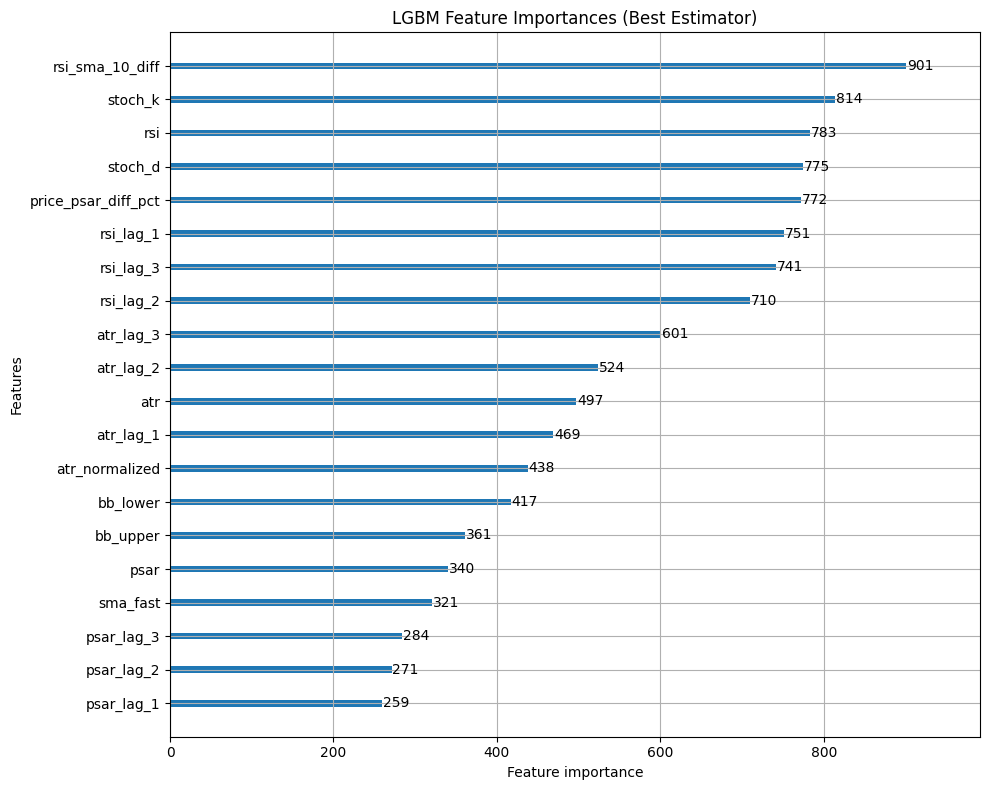

Training RL agent using Stable Baselines3 PPO...
RL Environment Scaler saved as rl_env_scaler_enhanced_lgbm.pkl
RL Environment Scaler loaded from rl_env_scaler_enhanced_lgbm.pkl


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=5000, episode_reward=-139.28 +/- 0.00
Episode length: 28777.00 +/- 0.00
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=-30.58 +/- 0.00
Episode length: 28777.00 +/- 0.00
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=15000, episode_reward=-37.10 +/- 0.00
Episode length: 28777.00 +/- 0.00


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=20000, episode_reward=-36.61 +/- 0.00
Episode length: 28777.00 +/- 0.00


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=25000, episode_reward=-30.43 +/- 0.00
Episode length: 28777.00 +/- 0.00
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=30000, episode_reward=-30.94 +/- 0.00
Episode length: 28777.00 +/- 0.00


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=35000, episode_reward=-26.75 +/- 0.00
Episode length: 28777.00 +/- 0.00
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=40000, episode_reward=-29.49 +/- 0.00
Episode length: 28777.00 +/- 0.00


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=45000, episode_reward=-29.69 +/- 0.00
Episode length: 28777.00 +/- 0.00


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=50000, episode_reward=-27.15 +/- 0.00
Episode length: 28777.00 +/- 0.00


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=55000, episode_reward=-23.12 +/- 0.00
Episode length: 28777.00 +/- 0.00
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=60000, episode_reward=-21.22 +/- 0.00
Episode length: 28777.00 +/- 0.00
New best mean reward!


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=65000, episode_reward=-23.12 +/- 0.00
Episode length: 28777.00 +/- 0.00


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=70000, episode_reward=-23.11 +/- 0.00
Episode length: 28777.00 +/- 0.00


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=75000, episode_reward=-24.73 +/- 0.00
Episode length: 28777.00 +/- 0.00
Best RL model loaded from callback (./rl_models_best/best_model.zip), last model saved to rl_agent_enhanced_lgbm.zip

--- Starting ML Backtest ---
RL Environment Scaler loaded from rl_env_scaler_enhanced_lgbm.pkl

--- ML Backtest Summary ---
Initial Balance: 1000.00 USDT | Final Value: 993.52 USDT | P/L: -6.48 USDT
Trades: 53 | Profitable: 8 | Win Rate: 15.09%


<ipython-input-29-c1a71da89b7b>:78: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(); ax2.grid(True, linestyle='--', alpha=0.7)


Backtest performance plot saved as ml_backtest_performance.png


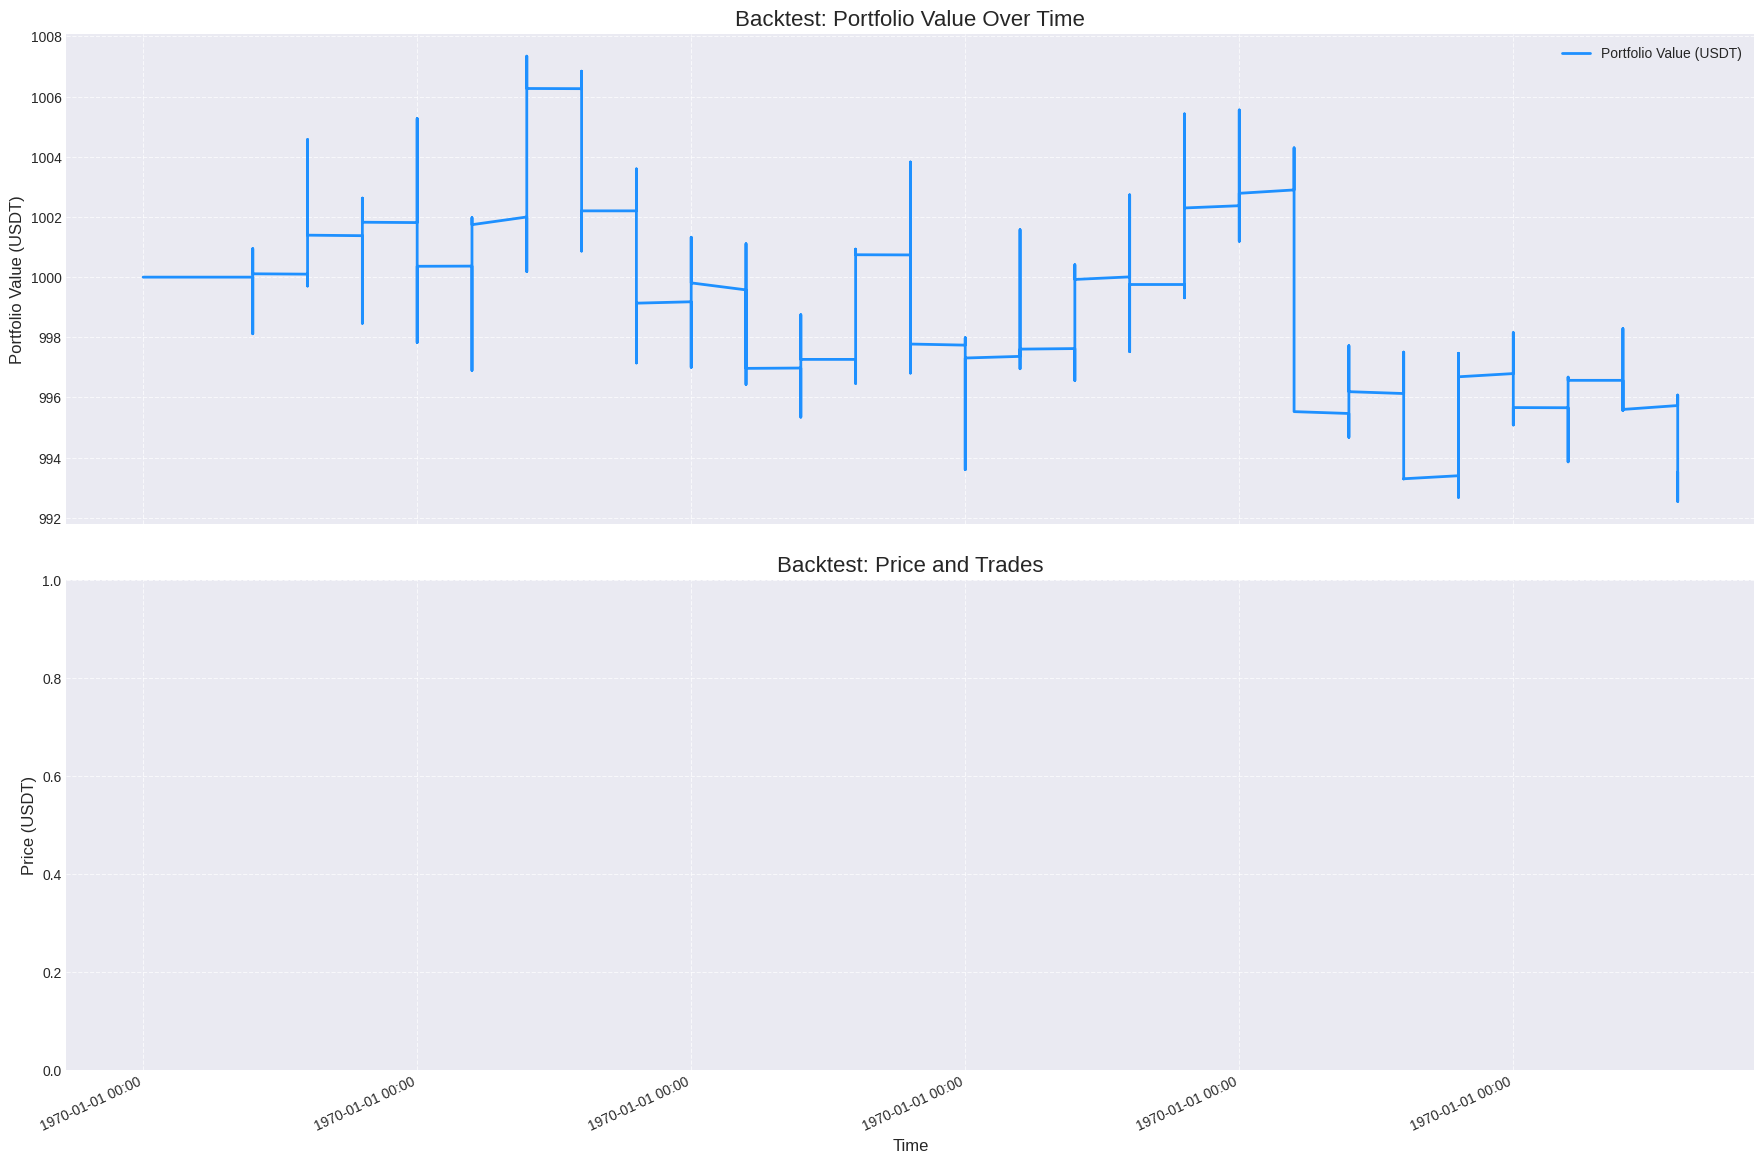


Attempting to start live bot...

--- Starting Live ML Bot (Duration: 10 mins) ---
Live loop start. Last kline in buffer: 2025-05-28 18:52:00+00:00
Error in live loop: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Traceback (most recent call last):
  File "<ipython-input-30-145c466167e0>", line 78, in run_live_ml_bot
    if not rl_base_names: print("CRITICAL: Cannot get RL base feature names."); time.sleep(1); continue
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Error in live loop: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Traceback (most recent call last):
  File "<ipython-input-30-145c466167e0>", line 78, in run_live_ml_bot
    if not rl_base_names: print("CRITICAL: Cannot get RL base feature names."); time.sleep(1); continue
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Error in live loop: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Traceback (most recent call last):
  File "<ipython-input-30-145c466167e0>", line 78, in run_live_ml_bot
    if not rl_base_names: print("CRITICAL: Cannot get RL base feature names."); time.sleep(1); continue
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Error in live loop: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Traceback (most recent call last):
  File "<ipython-input-30-145c466167e0>", line 78, in run_live_ml_bot
    if not rl_base_names: print("CRITICAL: Cannot get RL base feature names."); time.sleep(1); continue
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Error in live loop: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Traceback (most recent call last):
  File "<ipython-input-30-145c466167e0>", line 78, in run_live_ml_bot
    if not rl_base_names: print("CRITICAL: Cannot get RL base feature names."); time.sleep(1); continue
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Error in live loop: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Traceback (most recent call last):
  File "<ipython-input-30-145c466167e0>", line 78, in run_live_ml_bot
    if not rl_base_names: print("CRITICAL: Cannot get RL base feature names."); time.sleep(1); continue
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Error in live loop: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Traceback (most recent call last):
  File "<ipython-input-30-145c466167e0>", line 78, in run_live_ml_bot
    if not rl_base_names: print("CRITICAL: Cannot get RL base feature names."); time.sleep(1); continue
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Error in live loop: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Traceback (most recent call last):
  File "<ipython-input-30-145c466167e0>", line 78, in run_live_ml_bot
    if not rl_base_names: print("CRITICAL: Cannot get RL base feature names."); time.sleep(1); continue
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Error in live loop: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Traceback (most recent call last):
  File "<ipython-input-30-145c466167e0>", line 78, in run_live_ml_bot
    if not rl_base_names: print("CRITICAL: Cannot get RL base feature names."); time.sleep(1); continue
ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()



--- Live ML Bot Run Finished ---
Final Bot State: USDT: 1000.00, Asset: 0.0000000, InPos: False
Trades this session:
None

--- Bot Script Finished ---


In [31]:
# 10. Control and Execution
if __name__ == '__main__':
    TRAIN_LGBM = True
    TRAIN_RL = True
    RUN_BACKTEST = True
    RUN_LIVE = False

    print("--- Bot Script Starting ---")
    df_hist_1min = pd.DataFrame()

    if TRAIN_LGBM or TRAIN_RL or RUN_BACKTEST:
        print("Fetching historical data for training/backtesting...")
        lookback_period_main = "20 days ago UTC" if (TRAIN_LGBM or TRAIN_RL) else "7 days ago UTC"
        if binance_client:
            df_hist_1min = fetch_historical_klines(binance_client, SYMBOL, TIMEFRAME_STRATEGY, lookback_period_main)
        else:
            print("Binance client not available for data fetch.")
            if os.path.exists("df_hist_1min_for_train.csv"):
               try:
                   df_hist_1min = pd.read_csv("df_hist_1min_for_train.csv", index_col='timestamp', parse_dates=True)
                   if df_hist_1min.index.tz is None: df_hist_1min.index = df_hist_1min.index.tz_localize('UTC')
                   print(f"Loaded hist data from CSV ({len(df_hist_1min)} rows)")
               except Exception as e: print(f"Error loading CSV: {e}")
            else: print("df_hist_1min_for_train.csv not found.")

    if df_hist_1min.empty and (TRAIN_LGBM or TRAIN_RL or RUN_BACKTEST):
        print("No hist 1-min data. Cannot train/backtest.")
    elif not df_hist_1min.empty :
        print(f"Using {len(df_hist_1min)} 1-min klines for training/backtesting.")
        df_indicators_full = calculate_technical_indicators(df_hist_1min.copy())

        if df_indicators_full.empty or len(df_indicators_full) < 250:
            print("Not enough data after TA for ML.")
        else:
            if TRAIN_LGBM:
                X, y, lgbm_feat_cols = create_lgbm_features_and_labels(df_indicators_full)
                if not X.empty and len(X) > 200:
                    train_size = int(len(X) * 0.8)
                    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
                    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
                    print(f"LGBM Data Split: Train {len(X_train)}, Test {len(X_test)}")
                    train_lgbm_classifier(X_train, y_train, X_test, y_test, lgbm_feat_cols)
                else: print("Feature set X for LGBM empty/too small.")
            else: load_lgbm_model_data()

            if lgbm_model_data:
                df_rl_feed = prepare_data_for_rl(df_indicators_full.copy(), lgbm_model_data)
                if not df_rl_feed.empty and len(df_rl_feed) > 150:
                    if TRAIN_RL:
                        train_rl_agent_sb3(df_rl_feed, total_timesteps=RL_TRAINING_TIMESTEPS)
                    else: load_rl_agent_sb3()
                    if RUN_BACKTEST and rl_agent and lgbm_model_data and rl_env_scaler:
                        run_ml_backtest(df_hist_1min, lgbm_model_data, rl_agent)
                    elif RUN_BACKTEST: print("Skipping backtest: Models/scaler not ready.")
                else: print(f"Data for RL agent empty/too short (len: {len(df_rl_feed if not df_rl_feed.empty else 0)}).")
            else: print("LGBM model not available. Cannot proceed with RL.")

    if RUN_LIVE:
        print("\nAttempting to start live bot...")
        if not lgbm_model_data: load_lgbm_model_data()
        if not rl_agent: load_rl_agent_sb3()
        live_ready = (binance_client or API_KEY == "YOUR_BINANCE_API_KEY") and lgbm_model_data and rl_agent and rl_env_scaler
        if live_ready: run_live_ml_bot(binance_client, lgbm_model_data, rl_agent, run_duration_minutes=10)
        else:
            print("\nCannot run live ML bot. Check missing components (client, LGBM, RL agent, RL scaler).")
    else: print("RUN_LIVE flag is False. Live bot will not start.")
    print("\n--- Bot Script Finished ---")
